# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [261]:
import pandas as pd
dataset = pd.read_csv('telcoduplic.csv')

In [241]:
dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2967-MXRAV,1,0,1,1,1,1,0,2,2,...,2,2,2,2,1,0,3,18.80,18.80,0
1,8992-CEUEN,0,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,2,18.85,18.85,0
2,9318-NKNFC,1,0,0,0,1,1,0,2,2,...,2,2,2,2,0,1,3,18.85,18.85,1
3,9975-SKRNR,1,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,3,18.90,18.90,0
4,1423-BMPBQ,0,0,1,1,1,1,0,2,2,...,2,2,2,2,0,1,3,19.00,19.00,0
5,1015-OWJKI,1,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,3,19.05,19.05,0
6,6569-KTMDU,0,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,3,19.10,19.10,0
7,6121-VZNQB,0,0,0,0,1,1,0,2,2,...,2,2,2,2,0,1,3,19.10,19.10,1
8,9441-QHEVC,1,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,3,19.10,19.10,0
9,7302-ZHMHP,0,0,0,0,1,1,0,2,2,...,2,2,2,2,0,0,3,19.15,19.15,0


### Getting the inputs and output

In [242]:
import numpy as np

# Set print options to display integers and avoid scientific notation
np.set_printoptions(precision=0, suppress=True, formatter={'all': '{:,.0f}'.format})

In [243]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [244]:
X

array([[1, 0, 1, ..., 3, 19, 19],
       [0, 0, 0, ..., 2, 19, 19],
       [1, 0, 0, ..., 3, 19, 19],
       ...,
       [1, 0, 1, ..., 3, 20, 0],
       [0, 0, 1, ..., 3, 73, 0],
       [1, 0, 0, ..., 0, 62, 0]])

In [245]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Creating the Training Set and the Test Set

In [246]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [247]:
X_train

array([[0, 0, 0, ..., 0, 21, 1,021],
       [0, 0, 0, ..., 2, 58, 1,045],
       [1, 0, 1, ..., 1, 77, 5,498],
       ...,
       [0, 0, 1, ..., 0, 50, 355],
       [1, 0, 1, ..., 3, 21, 829],
       [1, 0, 0, ..., 3, 52, 900]])

In [248]:
X_test

array([[0, 0, 0, ..., 3, 20, 599],
       [1, 1, 1, ..., 2, 85, 2,642],
       [0, 0, 0, ..., 0, 75, 1,213],
       ...,
       [0, 0, 1, ..., 0, 115, 8,100],
       [0, 0, 1, ..., 3, 92, 2,603],
       [0, 0, 1, ..., 2, 25, 1,108]])

In [249]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [250]:
y_test

array([0, 1, 0, ..., 0, 1, 0])

### Feature Scaling

In [251]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [252]:
X_train

array([[-1, -0, -1, ..., -1, -1, -1],
       [-1, -0, -1, ..., 0, -0, -1],
       [1, -0, 1, ..., -1, 0, 1],
       ...,
       [-1, -0, 1, ..., -1, -0, -1],
       [1, -0, 1, ..., 1, -1, -1],
       [1, -0, -1, ..., 1, -0, -1]])

## Part 2 - Building and training the model

### Building the model

In [253]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

### Training the model

In [254]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Inference

Making the predictons of the data points in the test set

In [255]:
y_pred = model.predict(sc.transform(X_test))

In [256]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [257]:

model.predict(sc.transform([[1,0,1,1,17,1,1,0,0,0,0,0,1,1,0,1,2,92.55,1515.1]]))


array([1])

## Part 3: Evaluating the model 

### Confusion Matrix

In [258]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[950, 99],
       [164, 196]])

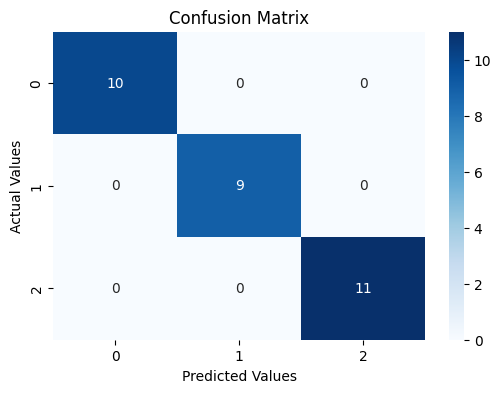

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset and create train/test splits
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Generate predictions
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


### Accuracy

In [260]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0